<a href="https://colab.research.google.com/github/fpires/Ciencia_Dados/blob/main/Nivel_Obesidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Flavio Louzada

**Matrícula:** 2025000

**Dataset:** [ObesityDataSet_raw_and_data_sinthetic.csv](https://www.kaggle.com/datasets/manvendrarajsingh/obesitydataset-raw-and-data-sinthetic)


## **Análise Exploratória e Modelagem Preditiva do Risco de Obesidade**

##### Este código tem como objetivo principal **explorar a relação entre hábitos de vida, alimentação e o risco de obesidade** em indivíduos, utilizando o dataset ObesityDataSet_raw_and_data_sinthetic.csv do Kaggle.

Etapas:

1.  **Entendimento do Problema:** Vamos carregar e inspecionar os dados para entender quais informações temos sobre os indivíduos (idade, peso, altura, hábitos alimentares, nível de atividade física, etc.) e seu respectivo nível de obesidade.
2.  **Limpeza e Preparação:** Dados reais raramente são perfeitos. Realizaremos etapas essenciais de limpeza, como verificar valores ausentes e duplicatas, e prepararemos as variáveis para a modelagem.
3.  **Análise Exploratória:** Visualizaremos as distribuições das variáveis e as relações entre elas para descobrir padrões e insights, como o impacto de certos hábitos alimentares no IMC e nos níveis de obesidade.
4.  **Pré-processamento para Machine Learning:** Converteremos variáveis categóricas em formatos numéricos (One-Hot Encoding) e padronizaremos variáveis numéricas (StandardScaler), etapas cruciais para que os algoritmos de aprendizado de máquina funcionem corretamente.
5.  **Clusterização:** Usaremos algoritmos de clusterização (K-Means) para agrupar indivíduos com características de estilo de vida e saúde semelhantes, sem conhecimento prévio dos seus níveis de obesidade, buscando identificar perfis de risco.
6.  **Classificação:** Construiremos e avaliaremos modelos de classificação (Regressão Logística, Árvore de Decisão e Random Forest) para **prever o nível de obesidade** de um indivíduo com base em seus hábitos e características, tratando o nível de obesidade como uma categoria (e.g., "Peso Normal", "Sobrepeso", "Obeso Tipo I").
7.  **Regressão:** Além da classificação, demonstraremos um modelo de regressão para **prever o Índice de Massa Corporal (IMC)**, uma medida contínua do risco de obesidade, com base nos mesmos fatores.
8.  **Validação Cruzada:** Para garantir que nossos modelos sejam robustos e generalizáveis, aplicaremos técnicas de validação cruzada para avaliar sua performance de forma mais confiável.



###Descrição das Colunas do Dataset

##### **Dicionário de Dados do Obesity Risk Dataset**

##### O dataset ObesityDataSet_raw_and_data_sinthetic.csv contém informações cruciais sobre hábitos alimentares, atividade física e características físicas de indivíduos, com o objetivo de prever seu nível de obesidade.
##### Abaixo, uma descrição detalhada de cada coluna utilizada em nossa análise:

##### **Variáveis de Identificação e Características Físicas:**
##### **Gender**: Gênero do indivíduo (Male/Female).
##### **Age**: Idade do indivíduo (em anos).
##### **Height**: Altura do indivíduo (em metros).
##### **Weight**: Peso do indivíduo (em quilogramas).
##### **bmi**: **(Calculada)** Índice de Massa Corporal, derivado de weight / (height)^2. Uma métrica chave para avaliar o peso em relação à altura.

##### **Variáveis de Hábitos Alimentares:**
##### **family_history_with_overweight**: Indica se há histórico familiar de sobrepeso (Yes/No).
##### **FAVC**: Consumo frequente de alimentos de alto teor calórico (Yes/No).
##### **FCVC**: Frequência do consumo de vegetais nas refeições (Numérico: 1, 2 ou 3 - Não, Às Vezes, Frequentemente).
##### **NCP**: Número de refeições principais por dia (Numérico: 1, 2, 3 ou 4+).
##### **CAEC**: Consumo de alimentos entre as refeições (Categorical: Always, Frequently, Sometimes, No).
##### **CH2O**: Consumo diário de água (Numérico: 1, 2 ou 3 - Menos de 1L, 1-2L, Mais de 2L). (Nota: no dataset original, pode ser interpretado como frequência, mas o valor numérico indica volume ou frequência crescente).
##### **CALC**: Consumo de álcool (Categorical: Always, Frequently, Sometimes, No).
##### **SCC**: Monitoramento do consumo de calorias (Yes/No).

##### **Variáveis de Atividade Física e Estilo de Vida:**
##### **FAF**: Frequência de atividade física (Numérico: 0, 1, 2 ou 3 - Sem atividade, 1-2 dias/semana, 2-4 dias/semana, 4-5 dias/semana).
##### **TUE**: Tempo de uso de dispositivos tecnológicos (e.g., celular, TV, computador) (Numérico: 0, 1 ou 2 - 0-2 horas, 3-5 horas, Mais de 5 horas).
##### **SMOKE**: Indica se o indivíduo fuma (Yes/No).
##### **MTRANS**: Principal meio de transporte utilizado (Categorical: Automobile, Motorbike, Public_Transportation, Walking, Bike).

##### **Variável Alvo (Target):**
##### **NObeyesdad**: Nível de obesidade do indivíduo (Categorical: Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Insufficient_Weight).
##### **Esta é a variável que o modelo irá prever.**


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.



In [1]:
# Célula 3: Instalação e Importação de Bibliotecas

# Se você não tiver essas bibliotecas instaladas, descomente as linhas abaixo e execute esta célula.
# !pip install pandas scikit-learn matplotlib seaborn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA # Para visualização de clusters

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100


In [3]:
import kagglehub

# Download da última versão
path = kagglehub.dataset_download("manvendrarajsingh/obesitydataset-raw-and-data-sinthetic")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/obesitydataset-raw-and-data-sinthetic


In [4]:
# Célula 4: Carregamento e Visão Geral do Dataset

try:
    df = pd.read_csv('/kaggle/input/obesitydataset-raw-and-data-sinthetic/ObesityDataSet_raw_and_data_sinthetic.csv')

    print("Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: Arquivo 'ObesityDataSet_raw_and_data_sinthetic.csv' não encontrado.")
    # Crie um DataFrame vazio para evitar erros nas próximas células
    df = pd.DataFrame()


Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' carregado com sucesso!


In [ ]:
    # Informações gerais do dataset
    df.info()

In [ ]:
# Primeiras 5 linhas do dataset
df.head()

In [ ]:
# Estatísticas descritivas das colunas numéricas
df.describe().T

# Limpeza e Preparação dos Dados

In [ ]:


if df.empty:
    print("Dataset não carregado, pulando limpeza e preparação.")
else:
    # 1. Padronização de nomes de colunas
    df.columns = df.columns.str.strip().str.lower()
    print("Nomes das colunas padronizados para minúsculas.")

    # 2. Verificação de valores ausentes (missing values) antes de qualquer transformação
    print("\nVerificando valores ausentes ANTES da limpeza detalhada:")
    print(df.isnull().sum())

    # 3. Verificação de duplicatas
    print("\nVerificando linhas duplicadas:")
    print(f"Número de linhas duplicadas antes: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print(f"Número de linhas duplicadas depois: {df.duplicated().sum()}")

    # 4. Tratamento de Tipos de Dados e Mapeamento
    # 'gender' para consistência (Female/Male)
    df['gender'] = df['gender'].replace({'Male': 'Male', 'Female': 'Female'}).str.capitalize()

    # Mapeamento de colunas binárias para numéricos (0 ou 1)
    binary_cols = ['family_history_with_overweight', 'favc', 'scc', 'smoke']
    for col in binary_cols:
        if col in df.columns:
            # Converte para string e depois para minúsculas antes de mapear
            # Usa .map(), e se algo não mapear, será NaN
            df[col] = df[col].astype(str).str.lower().map({'yes': 1, 'no': 0})

            # Se ainda houver NaN, preenche com 0 (que é um valor razoável para "não ter")
            if df[col].isnull().any():
                df[col].fillna(0, inplace=True) # Imputa NaN com 0 para colunas binárias
                print(f"NaNs na coluna '{col}' imputados com 0.")

            # Converte para int64 (não 'Int64' para evitar reintroduzir a capacidade de NaN)
            df[col] = df[col].astype(int)
            print(f"Coluna '{col}' mapeada para 0/1 e convertida para int.")
        else:
            print(f"AVISO: Coluna binária '{col}' não encontrada no DataFrame.")


    # Mapeamento de variáveis ordinais para números (CH2O e CALC)
    df['ch2o']
    df['ch2o'] = df['ch2o'].astype(str).str.lower().replace({
        'no': 1, 'sometimes': 2, 'frequently': 3, 'always': 4
    })
    df['ch2o'] = pd.to_numeric(df['ch2o'], errors='coerce')
    # Imputa NaNs para ch2o
    if df['ch2o'].isnull().any():
        df['ch2o'].fillna(df['ch2o'].median(), inplace=True)
        print("NaNs na coluna 'ch2o' imputados com a mediana.")
    print("Coluna 'ch2o' mapeada para numérico.")


    df['calc'] = df['calc'].astype(str).str.lower().replace({
        'no': 1, 'sometimes': 2, 'frequently': 3, 'always': 4
    })
    df['calc'] = pd.to_numeric(df['calc'], errors='coerce')
    # Imputa NaNs para calc se aparecerem
    if df['calc'].isnull().any():
        df['calc'].fillna(df['calc'].median(), inplace=True)
        print("NaNs na coluna 'calc' imputados com a mediana.")
    print("Coluna 'calc' mapeada para numérico.")


    # Cálculo do IMC (BMI)
    df['bmi'] = df['weight'] / (df['height']**2)
    if df['bmi'].isnull().any(): # Caso haja divisão por zero, por exemplo
        df['bmi'].fillna(df['bmi'].median(), inplace=True)
        print("NaNs na coluna 'bmi' imputados com a mediana.")

    # 5. Verificação FINAL de NaNs após todas as operações
    print("\nVerificação final de NaNs (todos devem ser zero AGORA):")
    print(df.isnull().sum())
    # Se ainda houver NaNs aqui, então há um problema em outra coluna.
    print("\nDataset após limpeza, preparação e imputação:")



In [ ]:
df.info()

In [ ]:
df.head()

As colunas **family_history_with_overweight**, **favc**, **smoke**, e **scc** foram escolhidas para serem incluídas no dataset (e, em alguns casos, especificamente transformadas em 0/1) por serem variáveis binárias importantes que representam fatores de risco conhecidos ou potenciais para a obesidade.

**family_history_with_overweight** (Histórico familiar de sobrepeso):

A genética e o ambiente familiar desempenham um papel significativo no desenvolvimento da obesidade. Se uma pessoa tem pais ou irmãos com sobrepeso ou obesidade, ela tem uma probabilidade maior de desenvolver a condição. Isso pode ser devido a fatores genéticos herdados, mas também a hábitos alimentares e de estilo de vida compartilhados dentro da família.
Representa: Uma predisposição genética e/ou ambiental de longo prazo.

**favc** (Frequent consumption of high caloric food - Consumo frequente de alimentos calóricos):

Por que é importante: Este é um fator de estilo de vida direto e muito influente. O consumo regular de alimentos com alta densidade calórica (geralmente ricos em açúcar, gorduras e processados) é uma causa primária do ganho de peso e obesidade.
Representa: Um hábito alimentar que contribui diretamente para o balanço energético positivo (mais calorias consumidas do que gastas).

**smoke** (Smoke - Fuma):

Por que é importante: Embora a relação entre tabagismo e obesidade possa parecer contraintuitiva para alguns (já que o tabagismo pode suprimir o apetite ou aumentar o metabolismo em repouso em alguns casos), estudos mostram uma associação complexa. Pessoas que param de fumar frequentemente ganham peso. Além disso, o tabagismo pode estar associado a outros comportamentos de saúde menos saudáveis. A inclusão dessa variável permite que o modelo capture essa relação, seja ela direta ou indireta, ou mediada por outros fatores de estilo de vida.
Representa: Um comportamento de saúde que pode impactar o peso, seja diretamente ou em associação com outros fatores.

**scc** (Calories consumption monitoring - Monitoramento do consumo de calorias):

Por que é importante: Esta variável indica se o indivíduo monitora ativamente o que come e bebe. Pessoas que monitoram seu consumo de calorias (seja contando calorias, acompanhando por aplicativos, etc.) tendem a ter mais consciência de sua ingestão e, consequentemente, podem ter maior controle sobre seu peso. A falta de monitoramento pode levar a um consumo excessivo não intencional.
Representa: Um comportamento de autoconsciência e controle dietético, que é um fator protetor ou de risco dependendo de sua presença ou ausência.

Essas quatro colunas foram escolhidas (ou mantidas e transformadas em 0/1) porque representam fatores de risco e comportamentos de estilo de vida que são cientificamente reconhecidos por influenciar o peso corporal e o risco de obesidade. Ao convertê-las para 0 ou 1, elas se tornam facilmente interpretáveis pelos algoritmos de Machine Learning como a presença (1) ou ausência (0) de uma determinada característica ou comportamento, tornando-as features valiosas para prever o nível de obesidade.

In [ ]:
# informações sobre as colunas do dataset
df.info()

#### **Gráfico: Distribuição dos Níveis de Obesidade**

In [ ]:
# 1. Distribuição da variável alvo: nobeyesdad (nível de obesidade)
plt.figure(figsize=(10, 6))
# Usando 'viridis' que é perceptualmente uniforme e amigável ao daltonismo
sns.countplot(y='nobeyesdad', data=df, order=df['nobeyesdad'].value_counts().index, palette='viridis')
plt.title('Distribuição dos Níveis de Obesidade')
plt.xlabel('Contagem')
plt.ylabel('Nível de Obesidade')
plt.show()

# O gráfico nos mostra a frequência (contagem) de indivíduos em cada uma das sete categorias de nível de obesidade presentes no dataset.
# As barras são ordenadas da categoria mais frequente (no topo) para a menos frequente (na base).

# Obesity_Type_I: É a categoria mais frequente, com aproximadamente 340-350 indivíduos. Isso indica que a maior parte da população neste dataset se enquadra na Obesidade Tipo I.
# Obesity_Type_III: É a segunda categoria mais frequente, com cerca de 320-330 indivíduos.
# Obesity_Type_II: Vem em seguida, com pouco menos de 300 indivíduos.
# Overweight_Level_II: Apresenta aproximadamente 290 indivíduos.
# Normal_Weight: Cerca de 280 indivíduos estão nesta categoria.
# Overweight_Level_I: Aproximadamente 270 indivíduos.
# Insufficient_Weight: É a categoria menos frequente, com cerca de 260-270 indivíduos.

#### **Gráfico: Distribuição de Idade e IMC**

In [ ]:
# 2. Distribuição de Idade e IMC
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True, color='teal')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Este é um Histograma com Estimativa de Densidade de Kernel (KDE).
# Eixo X (Horizontal): Idade (em anos).
# Eixo Y (Vertical): Frequência (ou contagem de indivíduos dentro de cada faixa etária).
# Barras (Histograma): Representam a contagem de indivíduos que se enquadram em faixas etárias específicas (bins). Por exemplo, as barras mais altas mostram onde a maioria das pessoas está concentrada em termos de idade.
# Linha Curva (KDE): A linha contínua (kde=True) é uma Estimativa de Densidade de Kernel. Ela suaviza o histograma e fornece uma estimativa da distribuição de probabilidade da idade na população.
# Ajuda a visualizar o formato geral da distribuição sem ser afetada pelas escolhas exatas dos "bins" do histograma.
# Cor: teal (verde-azulado), que é uma cor neutra e boa para acessibilidade.

# A maior concentração de indivíduos no dataset está na faixa etária dos 20 e poucos anos (aproximadamente 18 a 25 anos), com o pico mais alto por volta dos 20-22 anos. Há uma grande quantidade de indivíduos jovens neste dataset.
# Isso é evidente pelas barras mais altas e pelo pico na curva KDE nessa região.

#### **Gráfico: Relação entre IMC e Nível de Obesidade**

In [ ]:
# 3. Relação entre IMC e Nível de Obesidade
plt.figure(figsize=(12, 7))
# Usando 'cividis' ou 'plasma' que são perceptualmente uniformes
sns.boxplot(x='nobeyesdad', y='bmi', data=df, order=df['nobeyesdad'].value_counts().index, palette='cividis')
plt.title('IMC por Nível de Obesidade')
plt.xlabel('Nível de Obesidade')
plt.ylabel('IMC (kg/m²)')
plt.xticks(rotation=45)
plt.show()

# Tipo de Gráfico: Boxplot
# Eixo X (Horizontal): Nível de Obesidade (as diferentes categorias de classificação de peso/obesidade). As categorias estão rotacionadas em 45 graus para melhor legibilidade.
# Eixo Y (Vertical): IMC (kg/m²) - O Índice de Massa Corporal, uma medida contínua do peso em relação à altura.
# Elementos do Boxplot: Cada "caixa" no gráfico representa a distribuição do IMC para uma categoria específica de nível de obesidade.

# Há uma relação clara e progressiva entre o Nível de Obesidade e o IMC.
# À medida que nos movemos das categorias de peso mais baixas para as mais altas (da direita para a esquerda no gráfico, seguindo a ordem de obesidade), a mediana do IMC (linha central da caixa) aumenta consistentemente e significativamente.
# Insufficient_Weight tem os menores valores de IMC.
# Normal_Weight tem valores de IMC maiores que Insufficient_Weight, mas menores que Overweight_Level_I.
# Overweight_Level_I e Overweight_Level_II mostram uma progressão lógica.
# Obesity_Type_I, Obesity_Type_II e Obesity_Type_III apresentam os maiores valores de IMC, com Obesity_Type_III tendo a mediana mais alta de todas.

# Este boxplot nos diz quais são os valores de IMC típicos para os indivíduos em cada categoria e quão bem definidas são essas categorias em termos de IMC.


#### **Gráfico: Impacto do consumo frequente de alimentos calóricos no nível de obesidade**

In [ ]:
# 4. Impacto do consumo frequente de alimentos calóricos (favc) no nível de obesidade
plt.figure(figsize=(10, 6))
# Usando a paleta 'colorblind' do Seaborn
sns.countplot(x='favc', hue='nobeyesdad', data=df, palette='colorblind')
plt.title('Nível de Obesidade por Consumo Frequente de Alimentos Calóricos')
plt.xlabel('Consumo Frequente de Alimentos Calóricos (0=Não, 1=Sim)')
plt.ylabel('Contagem')
plt.legend(title='Nível de Obesidade')
plt.show()

# Eixo X (Horizontal): Consumo Frequente de Alimentos Calóricos (0=Não, 1=Sim). Este eixo categoriza os indivíduos com base se eles consomem (1) ou não (0) frequentemente alimentos calóricos.
# Eixo Y (Vertical): Contagem. Representa o número de indivíduos.
# Barras Agrupadas (hue): Cada grupo no eixo X (0 ou 1) contém várias barras coloridas. Cada cor de barra representa um Nível de Obesidade diferente (ex: "Normal_Weight", "Obesity_Type_I", etc.).

# O gráfico revela a relação entre um hábito alimentar específico (favc) e a distribuição dos níveis de obesidade.
# Ele nos permite ver como a presença ou ausência desse hábito se associa aos diferentes estados de peso dos indivíduos.

# Grupo "0" (Não Consome Frequente Alimentos Calóricos):
# O grupo "0" é predominantemente composto por indivíduos com peso normal e uma parte considerável com sobrepeso nível II. Isso ainda significa que a ausência de consumo frequente de alimentos calóricos está associada a um perfil de peso mais saudável,
# mas não tão drasticamente "abaixo do peso" ou "normal". Ainda assim, as categorias de obesidade mais severas são minimamente representadas neste grupo.

# Grupo "1" (Consome Frequente Alimentos Calóricos):
# Neste grupo, as barras para as categorias de obesidade (Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) e sobrepeso (Overweight_Level_I) são as mais proeminentes e muito mais altas do que as barras correspondentes no grupo "0".

# O gráfico demonstra uma forte e clara associação positiva: o consumo frequente de alimentos calóricos (favc=1) está diretamente associado a uma maior prevalência de sobrepeso e obesidade.
# Inversamente, a ausência de consumo frequente de alimentos calóricos (favc=0) está associada a uma maior prevalência de peso normal ou baixo peso.

#### **Gráfico: Matriz de Correlação para variáveis numéricas**

In [ ]:
# 5. Matriz de Correlação para variáveis numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(14, 12))
# Usando 'viridis' ou 'cividis' para heatmaps
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Eixos (Linhas e Colunas): Representam as mesmas variáveis numéricas do dataset.
# Células Coloridas: Cada célula mostra o coeficiente de correlação de Pearson entre o par de variáveis correspondente (uma na linha, outra na coluna).
# Valores Numéricos (annot=True): Os números dentro de cada célula são os coeficientes de correlação.
# Escala de Cores (Barra lateral direita): Indica a intensidade e direção da correlação.
# Amarelo/Verde claro (próximo de 1.00): Correlação positiva forte. Se uma variável aumenta, a outra também aumenta.
# Roxo/Azul escuro (próximo de -1.00): Correlação negativa forte. Se uma variável aumenta, a outra diminui.
# Verde/Roxo médio (próximo de 0): Pouca ou nenhuma correlação linear.

# Identificação de Preditoras: O bmi é, de longe, a variável mais correlacionada com weight e height, e mostra correlações esperadas com fatores de estilo de vida como favc, faf, ch2o, scc.
# Isso confirma que essas são features relevantes para prever o risco de obesidade.
# Forte correlação entre weight e bmi.


In [25]:
# Célula 7: Amostragem


# 1. Amostragem Aleatória Simples
df_sample_random = df.sample(n=200, random_state=42) # Amostra de 200 linhas
print("Amostra Aleatória Simples (200 linhas):")

Amostra Aleatória Simples (200 linhas):


In [24]:
df_sample_random.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi,Cluster
1337,Female,18.603496,1.681719,90.671871,1,1,1.524428,3.0,Sometimes,0,1.383831,0,0.130417,1.000000,2,Public_Transportation,Obesity_Type_I,32.060162,1
1763,Male,31.199261,1.848845,125.077863,1,1,2.496190,3.0,Sometimes,1,1.662117,0,0.992371,0.217632,2,Public_Transportation,Obesity_Type_II,36.591435,1
389,Female,16.000000,1.610000,65.000000,1,1,1.000000,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,Overweight_Level_I,25.076193,0
595,Male,17.210933,1.819557,58.325122,1,1,2.559600,4.0,Sometimes,0,2.000000,0,2.000000,0.331483,1,Automobile,Insufficient_Weight,17.616691,3
1735,Male,26.734476,1.816197,119.622764,1,1,2.247037,3.0,Sometimes,0,2.718408,0,0.763595,0.000000,2,Public_Transportation,Obesity_Type_II,36.265020,1


In [ ]:
# 2. Amostragem Estratificada
# Essencial quando queremos manter as proporções da variável alvo (ou outra categórica) na amostra.
# Isso é particularmente importante para classes desbalanceadas.
X_strat = df.drop('nobeyesdad', axis=1) # Usando 'nobeyesdad'
y_strat = df['nobeyesdad'] # Usando 'nobeyesdad'

X_train_stratified, X_sample_stratified, y_train_stratified, y_sample_stratified = train_test_split(
  X_strat, y_strat, test_size=0.1, stratify=y_strat, random_state=42
)
print("\n--- Amostra Estratificada por 'Nível de Obesidade' (10% do dataset) ---")
print("Distribuição da variável alvo na amostra estratificada:")

In [30]:
y_sample_stratified.value_counts(normalize=True)

,proportion
nobeyesdad,
Obesity_Type_I,0.167464
Obesity_Type_III,0.153110
Obesity_Type_II,0.143541
Overweight_Level_II,0.138756
Normal_Weight,0.133971
Overweight_Level_I,0.133971
Insufficient_Weight,0.129187


In [ ]:
print("\nDistribuição da variável alvo no dataset original:")

In [29]:
y_strat.value_counts(normalize=True)

,proportion
nobeyesdad,
Obesity_Type_I,0.168184
Obesity_Type_III,0.155247
Obesity_Type_II,0.142310
Overweight_Level_II,0.138955
Normal_Weight,0.135122
Overweight_Level_I,0.132247
Insufficient_Weight,0.127935


In [28]:
print("\nAs proporções dos níveis de obesidade são semelhantes no dataset original e na amostra estratificada, garantindo representatividade.")
print("\nAo comparar as duas distribuições, você pode ver que as proporções são extremamente próximas.")
print("\nPor exemplo, Obesity_Type_I: 0.167464 (amostra) vs. 0.168184 (original). A diferença é mínima.")
print("\nIsso confirma que a amostragem estratificada funcionou com sucesso, criando uma amostra de 10% que é um 'mini-espelho' fiel da distribuição dos níveis de obesidade do dataset completo.")


As proporções dos níveis de obesidade são semelhantes no dataset original e na amostra estratificada, garantindo representatividade.

Ao comparar as duas distribuições, você pode ver que as proporções são extremamente próximas.

Por exemplo, Obesity_Type_I: 0.167464 (amostra) vs. 0.168184 (original). A diferença é mínima.

Isso confirma que a amostragem estratificada funcionou com sucesso, criando uma amostra de 10% que é um 'mini-espelho' fiel da distribuição dos níveis de obesidade do dataset completo.


In [34]:
# Célula 8: One-Hot Encoding e Scaler (Pré-processamento para Machine Learning)

# Separando features (X) e target (y)
X = df.drop('nobeyesdad', axis=1) # Usando 'nobeyesdad'
y = df['nobeyesdad'] # Usando 'nobeyesdad'

# Identificando colunas para pré-processamento
# categorical_cols_for_ohe: APENAS as colunas que ainda são strings E precisam de One-Hot Encoding.
#                           As colunas 'family_history_with_overweight', 'favc', 'scc', 'smoke',
#                           'ch2o', 'calc' já foram mapeadas para números na Célula 5.
categorical_cols_for_ohe = ['gender', 'caec', 'mtrans']

# numerical_cols: Todas as colunas que são ou se tornaram numéricas.
numerical_cols = ['age', 'height', 'weight', 'bmi', # Intrinsicamente numéricas
                  'family_history_with_overweight', 'favc', 'fcvc', 'ncp', # Mapeadas ou já numéricas
                  'ch2o', 'calc', 'scc', 'smoke', 'faf', 'tue'] # Mapeadas ou já numéricas

# Criando o pré-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Padroniza colunas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_ohe) # Aplica One-Hot Encoding
    ],
    remainder='passthrough'
)

# Aplicando o pré-processamento aos dados
X_transformed = preprocessor.fit_transform(X)

# O LabelEncoder é usado para o target categórico (nível de obesidade)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Dados após One-Hot Encoding e StandardScaler.")
print(f"Dimensões do dataset transformado: {X_transformed.shape}")
print(f"Mapeamento de classes do Nível de Obesidade: {list(label_encoder.classes_)}")
print(f"Target codificado (primeiras 5 linhas): {y_encoded[:5]}")

Dados após One-Hot Encoding e StandardScaler.
Dimensões do dataset transformado: (2087, 26)
Mapeamento de classes do Nível de Obesidade: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
Target codificado (primeiras 5 linhas): [1 1 1 5 6]


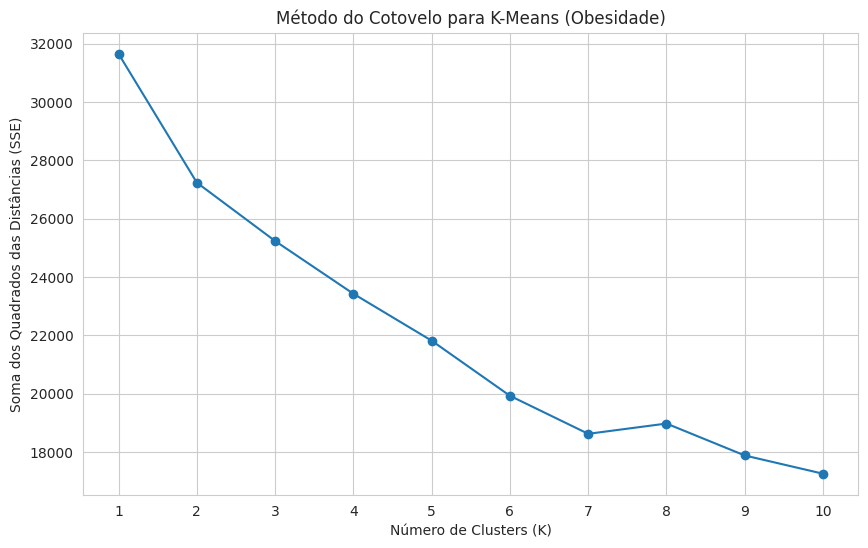


Dataset com 4 clusters adicionados. Contagem de indivíduos por cluster:
Cluster
0    459
1    866
2     96
3    666
Name: count, dtype: int64

Médias das variáveis numéricas chave por Cluster:
           age  height  weight    bmi  fcvc   ncp   faf   tue  ch2o  calc
Cluster                                                                  
0        30.54    1.66   83.19  30.20  2.35  2.07  0.82  0.42  1.79  1.48
1        24.39    1.75  110.71  36.28  2.54  2.91  0.91  0.67  2.21  1.96
2        20.93    1.64   62.36  22.94  2.59  2.63  1.30  0.63  2.03  1.74
3        20.53    1.68   61.90  21.98  2.28  2.87  1.24  0.83  1.88  1.60

Distribuição dos Níveis de Obesidade (Target) por Cluster (Proporções):
nobeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Cluster                                                          
0                          0.00           0.07            0.36   
1                          0.00           0.01            0.19   
2                        

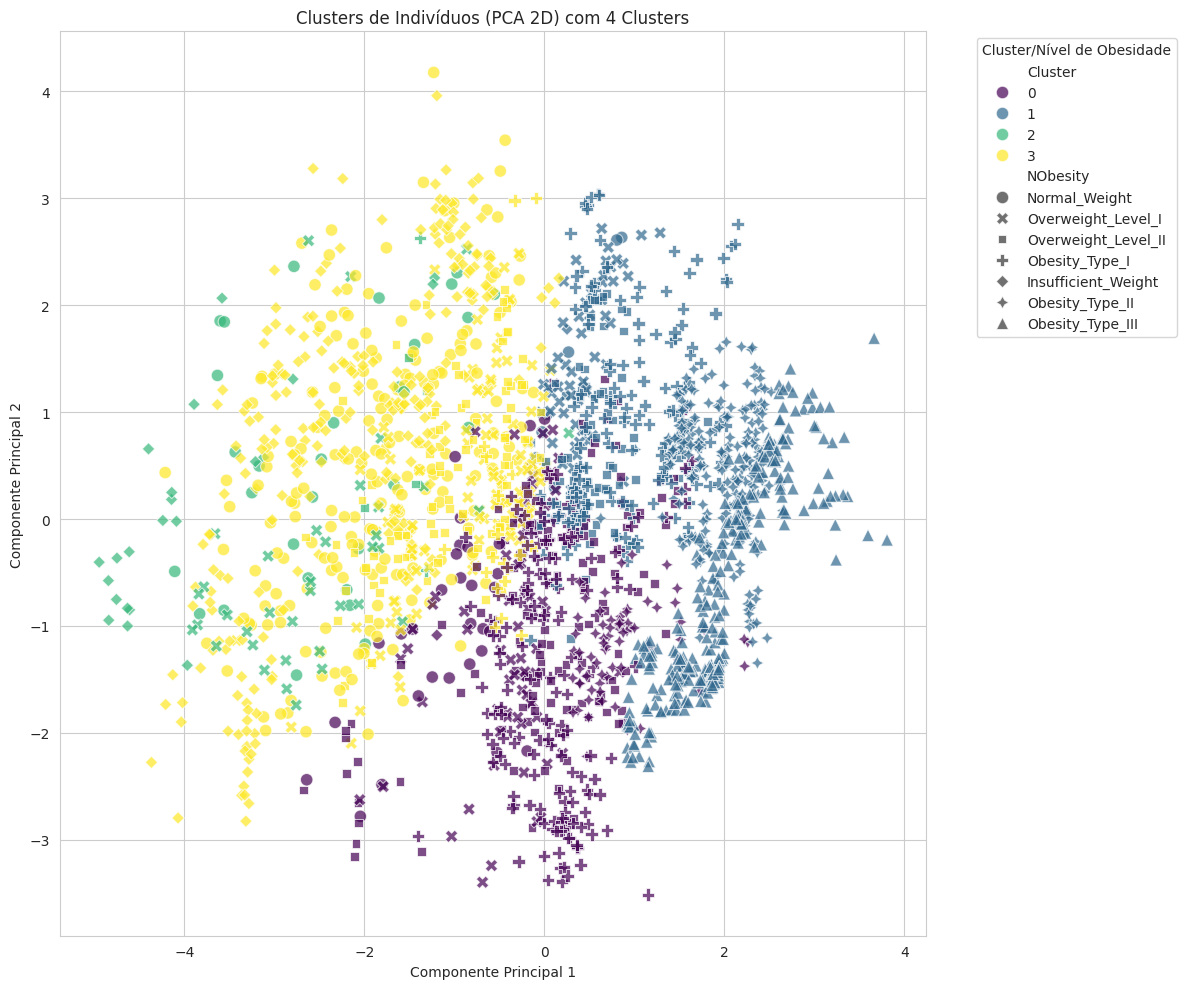

In [12]:
# Célula 9: Clusterização (K-Means)

  # Usando clusterização para agrupar indivíduos com características de estilo de vida e saúde semelhantes.
  # Usando os dados transformados para a clusterização.

  # Determinando o número ideal de clusters
  sse = [] # Soma dos Quadrados das Distâncias (Sum of Squared Errors)
  k_range = range(1, 11) # Testar de 1 a 10 clusters
  for k in k_range:
      kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto' -> boa prática
      kmeans.fit(X_transformed)
      sse.append(kmeans.inertia_)

  plt.figure(figsize=(10, 6))
  plt.plot(k_range, sse, marker='o')
  plt.title('Método do Cotovelo para K-Means (Obesidade)')
  plt.xlabel('Número de Clusters (K)')
  plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
  plt.xticks(k_range)
  plt.show()

  # Com base no gráfico do cotovelo, geralmente escolhemos um K onde a queda no SSE se torna menos acentuada.
  # Para este dataset, K=3 ou K=4 costumam ser boas escolhas. Vamos usar K=4 como exemplo.
  n_clusters_chosen = 4
  kmeans_model = KMeans(n_clusters=n_clusters_chosen, random_state=42, n_init='auto')
  clusters = kmeans_model.fit_predict(X_transformed)

  # Adiciona o resultado da clusterização ao DataFrame original para análise
  df['Cluster'] = clusters

  print(f"\nDataset com {n_clusters_chosen} clusters adicionados. Contagem de indivíduos por cluster:")
  print(df['Cluster'].value_counts().sort_index())

  # Analisando as características médias de cada cluster para entender os grupos formados
  print("\nMédias das variáveis numéricas chave por Cluster:")
  # Selecionamos algumas colunas relevantes para a média
  relevant_numeric_cols = ['age', 'height', 'weight', 'bmi', 'fcvc', 'ncp', 'faf', 'tue', 'ch2o', 'calc']
  print(df.groupby('Cluster')[relevant_numeric_cols].mean().round(2))

  print("\nDistribuição dos Níveis de Obesidade (Target) por Cluster (Proporções):")
  # Mostra qual proporção de cada nível de obesidade está em cada cluster
  print(pd.crosstab(df['Cluster'], df['nobeyesdad'], normalize='index').round(2)) # Usando 'nobeyesdad'

  # Visualização dos clusters (usando PCA para reduzir dimensionalidade para 2D)
  # PCA é crucial para visualizar clusters em dados de alta dimensão.
  pca = PCA(n_components=2)
  principal_components = pca.fit_transform(X_transformed)
  df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
  df_pca['Cluster'] = clusters
  df_pca['NObesity'] = y.reset_index(drop=True) # Adiciona o nível de obesidade original para contexto, resetando o índice

  plt.figure(figsize=(12, 10))
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=80, alpha=0.7, style='NObesity')
  plt.title(f'Clusters de Indivíduos (PCA 2D) com {n_clusters_chosen} Clusters')
  plt.xlabel('Componente Principal 1')
  plt.ylabel('Componente Principal 2')
  plt.legend(title='Cluster/Nível de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

In [ ]:
# Célula 10: Classificação (Regressão Logística e Random Forest)

# A classificação é usada para prever a categoria 'nobeyesdad'.
# Usaremos os dados pré-processados (X_transformed) e o target codificado (y_encoded).

# Divisão dos dados em treino e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded # Stratify é crucial para manter proporções de classes
)

print("\n--- Modelo de Classificação: Regressão Logística ---")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') # 'liblinear' é bom para datasets menores/multi-classe
log_reg_model.fit(X_train, y_train)

y_log_reg_pred = log_reg_model.predict(X_test)

# Avaliação da Regressão Logística
print(f"Acurácia da Regressão Logística: {accuracy_score(y_test, y_log_reg_pred):.2f}")
print("\nRelatório de Classificação:")
# report = classification_report(y_test, y_log_reg_pred, target_names=label_encoder.classes_, output_dict=True)
# df_report = pd.DataFrame(report).transpose().round(2)
# print(df_report)
print(classification_report(y_test, y_log_reg_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_log_reg_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


print("\n--- Modelo de Classificação: Árvore de Decisão ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)

# Avaliação da Árvore de Decisão
print(f"Acurácia da Árvore de Decisão: {accuracy_score(y_test, y_dt_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_dt_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\n--- Modelo de Classificação: Random Forest ---")
# Random Forest é um ensemble de árvores de decisão, geralmente oferece melhor performance.
# 'n_estimators' é o número de árvores na floresta. 'class_weight='balanced'' ajuda com classes desbalanceadas.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

# Avaliação do Random Forest
print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_rf_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_rf_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


--- Modelo de Regressão: Regressão Linear para prever IMC (BMI) ---
Erro Absoluto Médio (MAE) da Regressão Linear: 5.08
Coeficiente de Determinação (R²) da Regressão Linear: 0.41


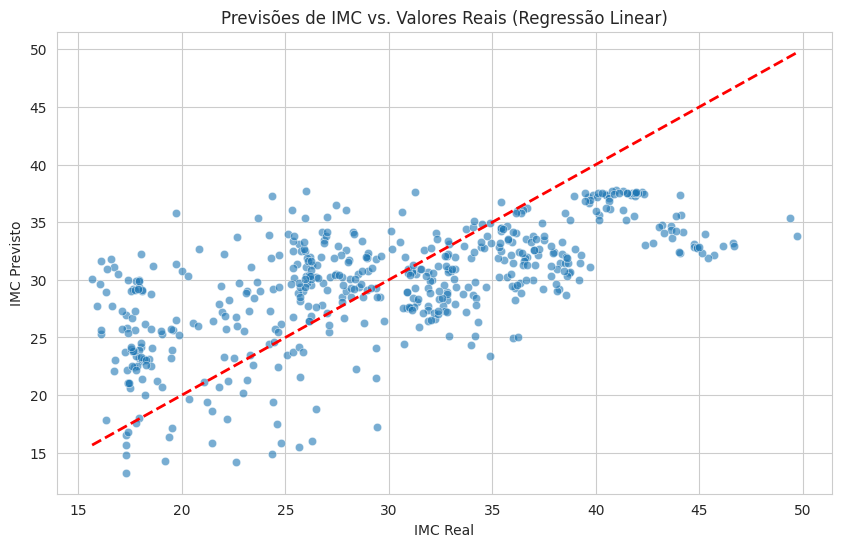

In [49]:
# Célula 11: Regressão (Previsão de BMI)

if df.empty:
    print("Dataset não carregado, pulando regressão.")
else:
    # Para regressão, vamos prever o 'bmi' (Índice de Massa Corporal), que é uma variável numérica.
    # Excluímos 'height' e 'weight' das features (X) para evitar multicolinearidade com o BMI.
    X_reg = df.drop(columns=['nobeyesdad', 'bmi', 'height', 'weight'], axis=1) # Usando 'nobeyesdad'

    # O pré-processamento aqui precisa ser refeito para as colunas específicas da regressão.
    # Identificando colunas para o pré-processamento da regressão
    categorical_cols_reg = ['gender', 'caec', 'mtrans']
    numerical_cols_reg = ['age', 'family_history_with_overweight', 'favc',
                          'fcvc', 'ncp', 'ch2o', 'calc', 'scc', 'smoke', 'faf', 'tue']

    preprocessor_reg = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols_reg),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_reg)
        ],
        remainder='passthrough'
    )

    # Aplicando o pré-processamento para regressão
    X_reg_transformed = preprocessor_reg.fit_transform(X_reg)
    y_reg = df['bmi'] # O alvo da regressão é o BMI

    # Divisão dos dados em treino e teste para regressão
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
        X_reg_transformed, y_reg, test_size=0.25, random_state=42
    )

    print("\n--- Modelo de Regressão: Regressão Linear para prever IMC (BMI) ---")
    from sklearn.linear_model import LinearRegression

    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_reg_train, y_reg_train)

    y_reg_pred = linear_reg_model.predict(X_reg_test)

    # Avaliação do modelo de regressão
    mae = mean_absolute_error(y_reg_test, y_reg_pred)
    r2 = r2_score(y_reg_test, y_reg_pred)

    print(f"Erro Absoluto Médio (MAE) da Regressão Linear: {mae:.2f}")
    print(f"Coeficiente de Determinação (R²) da Regressão Linear: {r2:.2f}")

    # Visualização das previsões vs. valores reais
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_reg_test, y=y_reg_pred, alpha=0.6)
    # Adiciona uma linha de identidade (onde y_real == y_previsto)
    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
    plt.title('Previsões de IMC vs. Valores Reais (Regressão Linear)')
    plt.xlabel('IMC Real')
    plt.ylabel('IMC Previsto')
    plt.show()

In [50]:
# Célula 12: Validação Cruzada (Cross-Validation)

if df.empty:
    print("Dataset não carregado, pulando validação cruzada.")
else:
    # A validação cruzada fornece uma avaliação mais robusta da performance do modelo,
    # mitigando o viés de uma única divisão de treino/teste.

    print("--- Avaliação de Modelo com Validação Cruzada (K-Fold) ---")

    # Número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # 1. Avaliando a acurácia do Random Forest para Classificação com validação cruzada
    # Usaremos os dados transformados para classificação (X_transformed, y_encoded).
    rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    cv_scores_rf = cross_val_score(rf_model_cv, X_transformed, y_encoded, cv=kf, scoring='accuracy')

    print(f"Acurácias do Random Forest (Classificação) por fold: {cv_scores_rf.round(2)}")
    print(f"Acurácia Média do Random Forest (Classificação) com Validação Cruzada ({n_splits}-fold): {np.mean(cv_scores_rf):.2f} (+/- {np.std(cv_scores_rf):.2f})")

    # 2. Avaliando o R² da Regressão Linear para previsão de BMI com validação cruzada
    # Reutilizamos X_reg_transformed e y_reg da célula anterior.
    linear_reg_model_cv = LinearRegression()
    cv_scores_reg_r2 = cross_val_score(linear_reg_model_cv, X_reg_transformed, y_reg, cv=kf, scoring='r2')

    print(f"\nR² por fold da Regressão Linear (Previsão de BMI): {cv_scores_reg_r2.round(2)}")
    print(f"R² médio da Regressão Linear (Previsão de BMI) com Validação Cruzada: {np.mean(cv_scores_reg_r2):.2f} (+/- {np.std(cv_scores_reg_r2):.2f})")

    print("\nAnálise de dados com o Dataset de Risco de Obesidade concluída!")

--- Avaliação de Modelo com Validação Cruzada (K-Fold) ---
Acurácias do Random Forest (Classificação) por fold: [0.99 1.   0.99 0.98 0.98]
Acurácia Média do Random Forest (Classificação) com Validação Cruzada (5-fold): 0.99 (+/- 0.01)

R² por fold da Regressão Linear (Previsão de BMI): [0.4  0.39 0.3  0.38 0.39]
R² médio da Regressão Linear (Previsão de BMI) com Validação Cruzada: 0.37 (+/- 0.04)

Análise de dados com o Dataset de Risco de Obesidade concluída!
